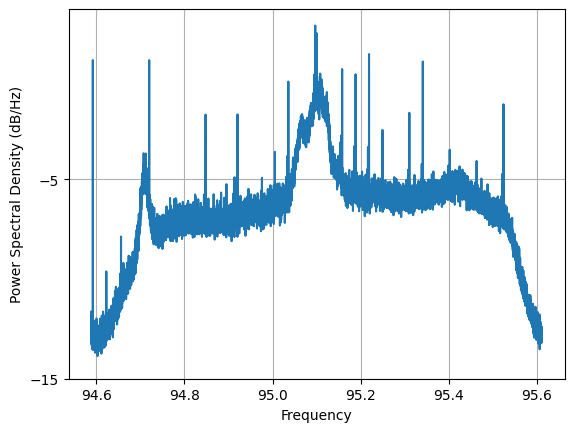

In [28]:
# importer la librairie du module SDR
from rtlsdr import RtlSdr
import wavio
import numpy as np
from scipy.stats import norm

# paramètres globaux
RATE = 1024000
FREQ = 95100000
duréeEnregistrement=4

temps=np.linspace(0,10,10*RATE)

# créer un objet connecté au module SDR
sdr = RtlSdr()
sdr.sample_rate = RATE
sdr.center_freq = FREQ
sdr.gain = 'auto'

# enregistrer des échantillons I/Q en nombres complexes
samples = sdr.read_samples(RATE*duréeEnregistrement)
sdr.close()

# graphique de la densité spectrale de puissance
import matplotlib.pyplot as plt

# psd = Power Spectral Density
plt.psd(samples, NFFT=2 ** 14, Fs=RATE / 1e6, Fc=FREQ / 1e6)
plt.show()

Enregistrement

In [26]:
FFT_samples = np.fft.fftshift(np.fft.fft(samples))
FFT_fréquences = np.fft.fftshift(np.fft.fftfreq(len(samples), 1/RATE))

gamma = 50000
x0 = 0

gaussienne = norm.pdf(FFT_fréquences, x0, gamma)
hamming = np.hamming(len(samples))
lorentzienne = (1 / np.pi) * (gamma / 2) / ((FFT_fréquences - x0) ** 2 + (gamma / 2) ** 2)
FFT_filtrées = FFT_samples*lorentzienne*30

samples_filtre = np.fft.ifft(np.fft.ifftshift(FFT_filtrées))

reel_f = np.real(samples_filtre)
imaginaire_f = np.imag(samples_filtre)

phase_f=np.arctan(imaginaire_f/reel_f)
signalAudio_f=np.gradient(phase_f)

reel = np.real(samples)
imaginaire = np.imag(samples)

phase=np.arctan(imaginaire/reel)
signalAudio=np.gradient(phase)

wavio.write("C:\\Users\\Justine Lejeune\\OneDrive\\Documents\\université\\automne 2024\\TechX\\Radio-FM\\SignalAudio_f.wav",signalAudio_f,RATE,sampwidth=2)
wavio.write("C:\\Users\\Justine Lejeune\\OneDrive\\Documents\\université\\automne 2024\\TechX\\Radio-FM\\SignalAudio.wav",signalAudio,RATE,sampwidth=2)

C:\Users\Justine Lejeune\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\wavio.py:259: ClippedDataWarning: Some data values have been clipped.  With scale=1.0, the interval of input values that will not be clipped is [-1.0000305180437934, 1.0]
  _warnings.warn(ClippedDataWarning(msg))


Filtre

In [4]:
# Paramètres
order = 2
RATE = 1024000  # Fréquence d'échantillonnage (en Hz)
low = 2000  # Fréquence de coupure basse (en Hz)
high = 350000  # Fréquence de coupure haute (en Hz)

# Normalisation des fréquences de coupure par rapport à la fréquence de Nyquist
nyquist = RATE / 2
low_norm = low / nyquist
high_norm = high / nyquist

# Calculer les coefficients du filtre passe-bande avec butter
b, a = butter(order, [low_norm, high_norm], btype='band')

# Appliquer le filtre passe-bande avec filtfilt pour éviter le déphasage
filtered_data = np.gradient(filtfilt(b, a, samples))

# Sauvegarder le signal filtré dans un fichier WAV
wavio.write("C:\\Users\\Justine Lejeune\\OneDrive\\Documents\\université\\automne 2024\\TechX\\Radio-FM\\SignalAudioFiltreButter.wav", filtered_data, RATE, sampwidth=2)

# # Calcul de la FFT pour visualiser le spectre du signal filtré
# freq = np.fft.fftshift(np.fft.fftfreq(len(signalAudio), 1/RATE))
# FFT_signalaudio = np.fft.fftshift(np.fft.fft(signalAudio))
# FFT_signalaudiofiltre = np.fft.fftshift(np.fft.fft(filtered_data))

# # Affichage du spectre du signal original et filtré
# fig, ax = plt.subplots()
# ax.plot(freq, FFT_signalaudio, label='Original')
# ax.plot(freq, FFT_signalaudiofiltre, label='Filtré')
# ax.set_xlabel('Fréquences (Hz)', fontsize=16)
# ax.set_ylabel('Amplitude', fontsize=16)
# ax.legend()
# plt.show()




NameError: name 'butter' is not defined